# Financial Modeling and Valuation Analysis for NVIDIA
This notebook contains a comprehensive financial analysis of NVIDIA, including:
- Data extraction and preprocessing
- Discounted Cash Flow (DCF) valuation
- Risk analysis (including Value at Risk estimation)

Each section is well-documented for clarity and readability.

First we import all libraries


In [ ]:
from datetime import datetime
from selenium import webdriver
from scipy.stats import kurtosis, skew, norm
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


### Income Statement Data Extraction and Cleaning

This section uses Selenium to scrape the income statement data from Yahoo Finance. The data is then cleaned and reshaped for easier analysis.

Steps:
1. Initialize the Chrome WebDriver.
2. Navigate to the income statement page and wait for the data to load.
3. Extract headers and financial data.
4. Reshape the data using the `melt` function for a long format suitable for Tableau.
5. Replace "TTM" with today's date.

In [135]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# URL of NVIDIA's income statement
url = 'https://finance.yahoo.com/quote/NVDA/financials/?ncid=100001119'
driver.get(url)

# Wait for the income statement section to be present
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section/div/div[1]')))

# Scroll down to load the entire income statment table
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

# Extract headers (years and TTM)
header_elements = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section/div/div[1]/div[1]')
headers = [header.text for header in header_elements]

# Split the combined string into separate headers if necessary
if len(headers) == 1:
    headers = headers[0].split(" ")

# Clean headers by removing any empty strings
headers = [header for header in headers if header.strip()]

# Initialize data list
data = []

# Locate all financial rows
rows = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section/div/div[1]/div[2]/div[position()>0]')
# Iterate through each row to extract metric names and values
for row in rows:
     cells = row.find_elements(By.CLASS_NAME, 'column')
     text_data = [cell.text for cell in cells]
     data.append(text_data)

# Create a DataFrame and assign columns
is_df = pd.DataFrame(data, columns=headers)

# Melt the DataFrame to unpivot it
is_df = pd.melt(is_df, id_vars=["Breakdown"], var_name="Date", value_name="Value")

# Get today's date in the format "MM/DD/YYYY"
today_date = datetime.now().strftime("%m/%d/%Y")

# Replace "TTM" with today's date in the "Date" column
is_df["Date"] = is_df["Date"].replace("TTM", today_date)

# Display the cleaned DataFrame
print(is_df.head())

# Save the DataFrame to a CSV file
is_df.to_csv("nvidia_income_statement.csv", index=False)

# Close the browser
driver.quit()


           Breakdown        Date       Value
0      Total Revenue  11/13/2024  96,307,000
1    Cost of Revenue  11/13/2024  23,137,000
2       Gross Profit  11/13/2024  73,170,000
3  Operating Expense  11/13/2024  13,588,000
4   Operating Income  11/13/2024  59,582,000



### Balance Sheet Data Extraction and Cleaning

This section follows a similar approach as the income statement:
1. Navigate to the balance sheet page on Yahoo Finance.
2. Extract headers and financial data.
3. Reshape the data using the `melt` function for a long format.
4. Replace "TTM" with today's date.

In [136]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# URL of NVIDIA's financial data
url = 'https://finance.yahoo.com/quote/NVDA/balance-sheet/'
driver.get(url)

# Wait for the balance sheet section to be present
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section')))

# Scroll down to load the entire balance sheet table
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

# Extract headers (years and TTM)
header_elements = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section/div/div[1]/div[1]')
headers = [header.text for header in header_elements]

# Split the combined string into separate headers if necessary
if len(headers) == 1:
    headers = headers[0].split(" ")

# Clean headers by removing any empty strings
headers = [header for header in headers if header.strip()]

# Initialize data list
data = []

# Locate all financial rows
rows = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section/div/div[1]/div[2]/div[position()>0]')
# Iterate through each row to extract metric names and values
for row in rows:
     cells = row.find_elements(By.CLASS_NAME, 'column')
     text_data = [cell.text for cell in cells]
     data.append(text_data)

# Create a DataFrame and assign columns
bs_df = pd.DataFrame(data, columns=headers)


# Melt the DataFrame to unpivot it
bs_df = pd.melt(bs_df, id_vars=["Breakdown"], var_name="Date", value_name="Value")

# Get today's date in the format "MM/DD/YYYY"
today_date = datetime.now().strftime("%m/%d/%Y")

# Replace "TTM" with today's date in the "Date" column
bs_df["Date"] = bs_df["Date"].replace("TTM", today_date)

# Display the cleaned DataFrame
print(bs_df.head())

# Save the DataFrame to a CSV file
bs_df.to_csv("nvidia_balance_sheet.csv", index=False)

# Close the browser
driver.quit()

                                 Breakdown       Date       Value
0                             Total Assets  1/31/2024  65,728,000
1  Total Liabilities Net Minority Interest  1/31/2024  22,750,000
2     Total Equity Gross Minority Interest  1/31/2024  42,978,000
3                     Total Capitalization  1/31/2024  51,437,000
4                      Common Stock Equity  1/31/2024  42,978,000


### Cash Flow Data Extraction and Cleaning

This section scrapes the cash flow data, processes it similarly to the income statement and balance sheet, and saves the cleaned data to a CSV file.

**Steps:**
1. Navigate to the cash flow page on Yahoo Finance.
2. Extract headers and financial data.
3. Clean and reshape the data.
4. Save the cleaned data for further analysis.

In [161]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# URL of NVIDIA's financial data
url = 'https://finance.yahoo.com/quote/NVDA/cash-flow/'
driver.get(url)

# Wait for the Cash Flow section to be present
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section')))

# Scroll down to load the entire Cash Flow table
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

# Extract headers (years and TTM)
header_elements = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section/div/div[1]/div[1]')
headers = [header.text for header in header_elements]

# Split the combined string into separate headers if necessary
if len(headers) == 1:
    headers = headers[0].split(" ")

# Clean headers by removing any empty strings
headers = [header for header in headers if header.strip()]

# Initialize data list
data = []

# Locate all financial rows
rows = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/section/div/div[1]/div[2]/div[position()>0]')
# Iterate through each row to extract metric names and values
for row in rows:
     cells = row.find_elements(By.CLASS_NAME, 'column')
     text_data = [cell.text.replace('--','0') for cell in cells]
     data.append(text_data)

# Create a DataFrame and assign columns
cf_df = pd.DataFrame(data, columns=headers)

# Melt the DataFrame to unpivot it
cf_df = pd.melt(cf_df, id_vars=["Breakdown"], var_name="Date", value_name="Value")

# Get today's date in the format "MM/DD/YYYY"
today_date = datetime.now().strftime("%m/%d/%Y")

# Replace "TTM" with today's date in the "Date" column
cf_df["Date"] = cf_df["Date"].replace("TTM", today_date)

print(cf_df.head())

# Save the DataFrame to a CSV file
cf_df.to_csv("nvidia_cash_flow.csv", index=False)

# Close the browser
driver.quit()

### Historica Data Extraction and Cleaning

This section scrapes the daily stock data, processes it similarly to the others, and saves the cleaned data to a CSV file.

In [138]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# URL of NVIDIA's financial data
url = 'https://finance.yahoo.com/quote/NVDA/history/?period1=1573514193&period2=1731366984'
driver.get(url)

# Wait for the historical data section to be present
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/div[1]/div[3]')))

# Scroll down to load the entire historical data table
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

# Extract headers (years and TTM)
header_elements = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/div[1]/div[3]/table/thead')
raw_headers = [header.text for header in header_elements]

# Clean and split headers
headers = []
for header in raw_headers:
    if "\n" in header:
        headers.extend(header.split("\n"))  # Split headers like "Close\nAdj Close"
    else:
        headers.append(header)

# Manually fix any known combined headers if needed
expected_headers = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
if headers != expected_headers:
    headers = expected_headers

# Clean headers by removing any empty strings
headers = [header for header in headers if header.strip()]

# Initialize data list
data = []

# Locate all financial rows
rows = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/div[1]/div[3]/table/tbody/tr[position()>0]')
# Iterate through each row to extract metric names and values
for row in rows:
     cells = row.find_elements(By.TAG_NAME, 'td')
     text_data = [cell.text for cell in cells]
     data.append(text_data)

# Create a DataFrame and assign columns
hd_df = pd.DataFrame(data, columns=headers)

# drop na
hd_df = hd_df.dropna()

print(hd_df.head())

# Save the DataFrame to a CSV file
hd_df.to_csv("nvidia_historical_data.csv", index=False)

# Close the browser
driver.quit()

### Valuation Metrics Extraction and Cleaning

This section scrapes some valuation data, processes it similarly to the others, and saves the cleaned data to a CSV file.

In [139]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# URL of NVIDIA's financial data
url = 'https://finance.yahoo.com/quote/NVDA/key-statistics/'
driver.get(url)

# Wait for the valuation metrics section to be present
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/div/section[2]')))

# Scroll down to load the entire valuation metrics table
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

# Extract headers (years and TTM)
header_elements = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/section[2]/div[2]/table[1]/thead')
headers = [header.text for header in header_elements]

# Split the combined string into separate headers if necessary
if len(headers) == 1:
    headers = headers[0].split(" ")

# Clean headers by removing any empty strings
headers = [header for header in headers if header.strip()]

headers.insert(0, 'Breakdown')

# Initialize data list
data = []

# Locate all financial rows
rows = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/section[2]/div[2]/table[1]/tbody/tr[position()>0]')
# Iterate through each row to extract metric names and values
for row in rows:
     cells = row.find_elements(By.TAG_NAME, 'td')
     text_data = [cell.text for cell in cells]
     data.append(text_data)

# Create a DataFrame and assign columns
vm_df = pd.DataFrame(data, columns=headers)

# Melt the DataFrame to unpivot it
vm_df = pd.melt(vm_df, id_vars=["Breakdown"], var_name="Date", value_name="Value")

# Get today's date in the format "MM/DD/YYYY"
today_date = datetime.now().strftime("%m/%d/%Y")

# Replace "TTM" with today's date in the "Date" column
vm_df["Date"] = vm_df["Date"].replace("Current", today_date)

# Display the cleaned DataFrame
print(vm_df.head())

# Save the DataFrame to a CSV file
vm_df.to_csv("nvidia_valuation_measures.csv", index=False)

# Close the browser
driver.quit()

                  Breakdown        Date  Value
0                Market Cap  11/13/2024  3.64T
1          Enterprise Value  11/13/2024  3.61T
2              Trailing P/E  11/13/2024  69.52
3               Forward P/E  11/13/2024  37.88
4  PEG Ratio (5yr expected)  11/13/2024   1.15


### Trading Information Extraction and Cleaning

This section scrapes some trading data, processes it similarly to the others, and saves the cleaned data to a CSV file.

In [140]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# URL of NVIDIA's trading data
url = 'https://finance.yahoo.com/quote/NVDA/key-statistics/'
driver.get(url)

# Wait for the trading information section to be present
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/section[2]/div[2]')))

# Scroll down to load the entire trading ingormation tables
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

headers = ['Metric', 'Value', 'Date']

# Initialize data list
data = []

# Locate all trading tables
rows = driver.find_elements(By.XPATH, '//*[@id="nimbus-app"]/section/section/section/article/article/div/section[2]/div/section[position()>0]/table/tbody/tr[position()>0]')


# Iterate through each row to extract metric names and values
for row in rows:
     cells = row.find_elements(By.TAG_NAME, 'td')
     text_data = [cell.text for cell in cells]
     text_data.append(today_date)
     data.append(text_data)

# Create a DataFrame and assign columns
ti_df = pd.DataFrame(data, columns=headers)

# Save the DataFrame to a CSV file
ti_df.to_csv("nvidia_trading_information.csv", index=False)

# Close the browser
driver.quit()

### WACC Calculation

The Weighted Average Cost of Capital (WACC) is the discount rate used in DCF valuation. It reflects the company's cost of financing from both equity and debt.

Formula:

WACC = (𝐸/(𝐸+𝐷)×Re)+(𝐷/𝐸(+𝐷)×Rd×(1−Tax Rate))

* E: Market value of equity
* D: Market value of debt
* Re: Cost of equity (from CAPM)
* Rd: Cost of debt
* Tax Rate: Corporate tax rate

WACC is used as the discount rate in DCF analysis, representing the average return required by investors.



In [188]:
# Assumed values for WACC calculation (these can be adjusted based on your analysis)
risk_free_rate = 0.045  # 4.5% (e.g., 10-year U.S. Treasury yield)
market_return = 0.10    # 10% (historical market return)
tax_rate = 0.21         # 21% corporate tax rate

# Step 1: Calculate Market Value of Equity (E)
# Extract Market Cap from valuation data (convert trillions to billions if necessary)
market_cap_str = vm_df.loc[(vm_df['Breakdown'] == 'Market Cap') & (vm_df['Date'] == today_date), 'Value'].values[0]

market_cap = float(market_cap_str.replace("B", "")) * 1e9 if "B" in market_cap_str else float(market_cap_str.replace("T", "")) * 1e12

# # Step 2: Calculate Market Value of Debt (D)
total_debt_str = bs_df.loc[(bs_df['Breakdown'] == 'Total Debt') & (bs_df['Date'] == today_date), 'Value'].values

if total_debt_str.size == 0:
    total_debt_str = bs_df.loc[(bs_df['Breakdown'] == 'Total Debt'), 'Value'].values[0]
else:
    total_debt_str = total_debt_str[0]
total_debt = float(total_debt_str.replace("B", "")) * 1e9 if "B" in total_debt_str else float(total_debt_str.replace("T", "").replace(",","")) 

# Step 3: Estimate Cost of Equity (Re) using CAPM
beta = float(ti_df.loc[ti_df['Metric'] == 'Beta (5Y Monthly)', 'Value'].values[0])
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# Step 4: Estimate Cost of Debt (Rd)
# Using interest expense and total debt
interest_expense_str = is_df.loc[(is_df['Breakdown'] == 'Interest Expense') & (is_df['Date'] == today_date), 'Value'].values[0]
interest_expense = float(interest_expense_str.replace(",", ""))
cost_of_debt = interest_expense / total_debt

# # Step 5: Calculate WACC
equity_weight = market_cap / (market_cap + total_debt)
debt_weight = total_debt / (market_cap + total_debt)

wacc = (equity_weight * cost_of_equity) + (debt_weight * cost_of_debt * (1 - tax_rate))

# # Output the WACC
wacc_output = {
    "Market Cap": market_cap,
    "Total Debt": total_debt,
    "Cost of Equity (Re)": cost_of_equity,
    "Cost of Debt (Rd)": cost_of_debt,
    "Equity Weight": equity_weight,
    "Debt Weight": debt_weight,
    "WACC": wacc
}

wacc_df = pd.DataFrame(wacc_output.items(), columns=["Metric", "Value"])
print(wacc_df)

                Metric         Value
0           Market Cap  3.640000e+12
1           Total Debt  1.105600e+07
2  Cost of Equity (Re)  1.363000e-01
3    Cost of Debt (Rd)  2.270260e-02
4        Equity Weight  9.999970e-01
5          Debt Weight  3.037353e-06
6                 WACC  1.362996e-01


### Terminal Growth Rate Calculation

To estimate the Terminal Growth Rate, we used a combination of historical Free Cash Flow (FCF) analysis and the company's Return on Equity (ROE). The process involved:

1. Data Cleaning: Extracted Free Cash Flow values and converted them to numerical format (handling billions and millions).

2. Historical FCF Growth Rate:
- Calculated the average percentage change in FCF over time.
- Derived the Compounded Annual Growth Rate (CAGR)


3. ROE and Retention Ratio Method:
- Estimated ROE using Net Income and Average Shareholders' Equity.
- Calculated the Terminal Growth Rate using:
- Terminal Growth Rate=ROE×Retention Ratio

4. Final Selection: Chose the lower of the average historical growth rate and the ROE-based estimate for conservatism.

This approach provides a realistic and balanced estimate for the terminal growth rate in the DCF model.

In [187]:
fcf_data = cf_df.loc[(cf_df['Breakdown'] == 'Free Cash Flow'), ['Date','Value']]
fcf_data['Value'] = ( fcf_data['Value']
    .str.replace(",", "")  # Remove commas
    .str.replace("B", "e9")  # Replace 'B' with 'e9' for billions
    .str.replace("M", "e6")  # Replace 'M' with 'e6' for millions
    .astype(float)
                    )
fcf_data = fcf_data.iloc[::-1]
fcf_data['Growth Rate'] = fcf_data['Value'].pct_change()
print(fcf_data['Value'].pct_change())
average_fcf_growth_rate = fcf_data['Growth Rate'].mean()
print(f"Average Historical FCF Growth Rate: {average_fcf_growth_rate:.2%}")

beginning_fcf = fcf_data['Value'].iloc[0]
ending_fcf = fcf_data['Value'].iloc[-1]
n_years = len(fcf_data) - 1  # Number of years

# Calculate CAGR using the formula
cagr = (ending_fcf / beginning_fcf) ** (1 / n_years) - 1

# Output the CAGR value
print(f"Calculated CAGR: {cagr:.2%}")

# Extract Net Income from the income statement (assuming it's labeled 'Net Income')
net_income = is_df.loc[(is_df['Breakdown'] == 'Net Income Common Stockholders') & (is_df['Date'] == today_date), 'Value'].str.replace(",", "").astype(float).values[0]

# Extract Shareholders' Equity from the balance sheet (assuming it's labeled 'Total Equity')
# Calculate the average of the last two reported equity values
equity_values = bs_df.loc[bs_df['Breakdown'] == 'Total Equity Gross Minority Interest', 'Value'].str.replace(",", "").astype(float)
average_equity = equity_values.iloc[-2:].mean()

# Calculate ROE
roe = net_income / average_equity
roe = roe / 100

# Retention Ratio
dividend_payout_ratio = float(ti_df.loc[ti_df['Metric'] == 'Payout Ratio 4', 'Value'].values[0].replace("%", "")) / 100
retention_ratio = 1 - dividend_payout_ratio

# Calculate Terminal Growth Rate using ROE and Retention Ratio
terminal_growth_rate_roe = roe * retention_ratio

terminal_growth_rate = min(average_fcf_growth_rate, terminal_growth_rate_roe)
print(f"Selected Terminal Growth Rate: {terminal_growth_rate:.2%}")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
54         NaN
43    0.732424
32   -0.531727
21    6.095851
10    0.731468
Name: Value, dtype: float64
Average Historical FCF Growth Rate: 175.70%
Calculated CAGR: 77.68%
Selected Terminal Growth Rate: 2.41%


### Discounted Cash Flow (DCF) Valuation

The **DCF model** is used to estimate the intrinsic value of NVIDIA's stock by projecting future Free Cash Flows (FCFs) and discounting them to present value. The key steps are:

1. **Assumptions and Inputs**:
   - Defined the number of shares outstanding.
   - Used the last reported Free Cash Flow value as the base.

2. **FCF Projections**:
   - Projected FCFs for the next 5 years using a conservative growth rate (minimum of CAGR and average historical growth rate).

3. **Terminal Value Calculation**:
   - Used the perpetuity growth method
     
4. **Discounting to Present Value**:
   - Discounted each projected FCF and the terminal value using WACC.

5. **Enterprise Value and Intrinsic Value per Share**:
   - Calculated the **Enterprise Value** by summing the discounted FCFs and terminal value.
   - Estimated the **Intrinsic Value per Share** by dividing the Enterprise Value by the number of shares outstanding.

6. **Output**:
   - Prepared a summary of the DCF results, including key metrics like ROE, WACC, growth rates, Enterprise Value, and Intrinsic Value per Share.
   - Saved the results to a CSV file for further analysis.

This approach provides a comprehensive estimate of NVIDIA's intrinsic value, accounting for future growth and risk.


In [174]:
# Define assumptions and inputs for the DCF model
shares_outstanding = float(ti_df.loc[ti_df['Metric'] == 'Shares Outstanding 5', 'Value'].values[0].replace("B", ""))* 1e9

# Extract the last reported Free Cash Flow value
last_fcf = fcf_data['Value'].iloc[-1]

# Step 1: Project Future Free Cash Flows (5-year projection)
# We'll use a conservative growth rate (e.g., 30%) instead of the high historical growth rate
projected_growth_rate = min(cagr, average_fcf_growth_rate)
projected_fcfs = []

for i in range(1, 6):  # Project for the next 5 years
    projected_fcf = last_fcf * (1 + projected_growth_rate)
    projected_fcfs.append(projected_fcf)
    last_fcf = projected_fcf

# Step 2: Calculate Terminal Value using the perpetuity growth method
terminal_value = projected_fcfs[-1] * (1 + terminal_growth_rate) / (wacc - terminal_growth_rate)

# Step 3: Discount Future FCFs and Terminal Value to Present Value
discounted_fcfs = [fcf / ((1 + wacc) ** i) for i, fcf in enumerate(projected_fcfs, start=1)]
discounted_terminal_value = terminal_value / ((1 + wacc) ** 5)

# Step 4: Calculate Enterprise Value and Intrinsic Value per Share
enterprise_value = sum(discounted_fcfs) + discounted_terminal_value
intrinsic_value_per_share = enterprise_value / shares_outstanding

# Step 5: Prepare the results for CSV output
dcf_results = {
    "Metric": [
        "ROE","WACC", "Terminal Growth Rate", "Average FCF Growth Rate","CAGR",
        "Projected Growth Rate", "Enterprise Value", "Intrinsic Value per Share"
    ],
    "Value": [
        roe,wacc, terminal_growth_rate, average_fcf_growth_rate,cagr,
        projected_growth_rate, enterprise_value, intrinsic_value_per_share
    ], 
    "Date": [
        today_date,today_date, today_date, today_date,today_date,
        today_date, today_date, today_date
    ]
}

# Create a DataFrame for the DCF valuation results
dcf_df = pd.DataFrame(dcf_results)

# Display the DataFrame directly
print(dcf_df)

# Save the DataFrame to a CSV file
dcf_df.to_csv("DCF_valuation_results.csv", index=False)
print("DCF valuation results saved to 'DCF_valuation_results.csv'")



                      Metric         Value        Date
0                        ROE  2.436869e-02  11/13/2024
1                       WACC  1.362996e-01  11/13/2024
2       Terminal Growth Rate  2.411770e-02  11/13/2024
3    Average FCF Growth Rate  1.757004e+00  11/13/2024
4                       CAGR  7.768191e-01  11/13/2024
5      Projected Growth Rate  7.768191e-01  11/13/2024
6           Enterprise Value  5.076499e+09  11/13/2024
7  Intrinsic Value per Share  2.069506e-01  11/13/2024
DCF valuation results saved to 'DCF_valuation_results.csv'


'DCF_valuation.csv'

### Value at Risk (VaR) Analysis

The **Value at Risk (VaR)** analysis estimates the potential loss in NVIDIA’s stock price over a given time period with specified confidence levels (95% and 99%). The analysis involves the following steps:

1. **Data Preparation**:
   - Converted the 'Date' column to datetime format and sorted the data.
   - Calculated the **Daily Returns** using the adjusted closing prices.

2. **Statistical Metrics Calculation**:
   - Calculated key statistics including:
     - **Mean Return**: Average daily return.
     - **Standard Deviation**: Measures the volatility of returns.
     - **Median and Mode**: Central tendency metrics.
     - **Kurtosis and Skewness**: Describe the shape of the returns distribution.
     - **Range, Minimum, and Maximum Returns**: Provides the spread of the data.
   - Computed **confidence intervals** for 95% and 99% levels.

3. **Value at Risk (VaR) Estimation**:
   - Used the normal distribution to estimate VaR at 95% and 99% confidence levels.
   - These metrics represent the worst expected loss on 95% and 99% of trading days.

4. **Results and Output**:
   - Created a summary of the calculated risk metrics and saved the results to a CSV file.
   - Displayed a histogram of daily returns with vertical lines indicating the VaR at 95% and 99% levels.

5. **Visualization**:
   - Plotted a histogram of the daily returns to visualize the distribution.
   - Added dashed lines for VaR at 95% (red) and 99% (green) to highlight the risk thresholds.

The VaR analysis helps quantify the potential downside risk of the stock, providing useful insights for risk management and portfolio analysis.


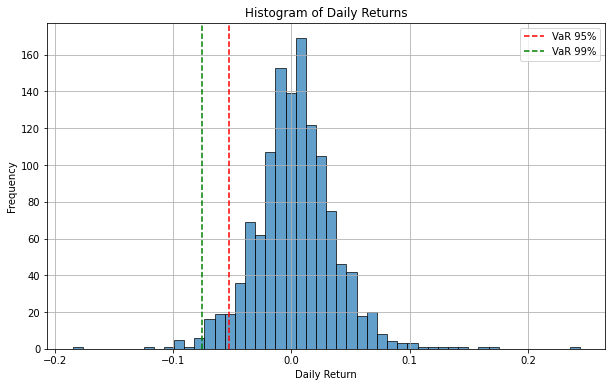

                         Metric        Value
0                          Mean     0.003221
1                Standard Error     0.000955
2                        Median     0.003507
3                          Mode     0.000000
4            Standard Deviation     0.033862
5               Sample Variance     0.001147
6                      Kurtosis          NaN
7                      Skewness          NaN
8                         Range     0.428775
9                       Minimum    -0.185000
10                      Maximum     0.243775
11                          Sum     4.052480
12                        Count  1258.000000
13       Confidence Level (95%)     0.001871
14       Confidence Level (99%)     0.002459
15  VaR at 95% Confidence Level    -0.052477
16  VaR at 99% Confidence Level    -0.075554


In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, norm

hd_df['Date'] = pd.to_datetime(hd_df['Date'])
hd_df = hd_df.sort_values(by='Date')

# Calculate Daily Returns
hd_df['Adj Close'] = hd_df['Adj Close'].astype(float)
hd_df['Daily Return'] = hd_df['Adj Close'].pct_change().dropna()

# Step 1: Calculate Key Statistics
mean_return = hd_df['Daily Return'].mean()
std_dev = hd_df['Daily Return'].std()
median_return = hd_df['Daily Return'].median()
mode_return = hd_df['Daily Return'].mode().values[0]
variance = hd_df['Daily Return'].var()
kurt = kurtosis(hd_df['Daily Return'])
skewness = skew(hd_df['Daily Return'])
min_return = hd_df['Daily Return'].min()
max_return = hd_df['Daily Return'].max()
range_return = max_return - min_return
count = hd_df['Daily Return'].count()
confidence_95 = 1.96 * (std_dev / np.sqrt(count))
confidence_99 = 2.576 * (std_dev / np.sqrt(count))

# Step 2: Value at Risk (VaR) Calculations
VaR_95 = norm.ppf(0.05, mean_return, std_dev)
VaR_99 = norm.ppf(0.01, mean_return, std_dev)

# Prepare metrics for output
metrics = {
    "Metric": [
        "Mean", "Standard Error", "Median", "Mode", "Standard Deviation",
        "Sample Variance", "Kurtosis", "Skewness", "Range", "Minimum", "Maximum",
        "Sum", "Count", "Confidence Level (95%)", "Confidence Level (99%)",
        "VaR at 95% Confidence Level", "VaR at 99% Confidence Level"
    ],
    "Value": [
        mean_return, std_dev / np.sqrt(count), median_return, mode_return, std_dev,
        variance, kurt, skewness, range_return, min_return, max_return,
        hd_df['Daily Return'].sum(), count, confidence_95, confidence_99,
        VaR_95, VaR_99
    ]
}

# Create DataFrame for metrics
risk_metrics_df = pd.DataFrame(metrics)

# Save the risk metrics to a CSV file
output_metrics_path = "risk_analysis_metrics.csv"
risk_metrics_df.to_csv(output_metrics_path, index=False)

# Step 3: Plot Histogram of Daily Returns
plt.figure(figsize=(10, 6))
plt.hist(hd_df['Daily Return'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid()
plt.axvline(VaR_95, color='r', linestyle='dashed', linewidth=1.5, label='VaR 95%')
plt.axvline(VaR_99, color='g', linestyle='dashed', linewidth=1.5, label='VaR 99%')
plt.legend()
plt.show()

# Provide the path for the CSV output file
print(risk_metrics_df)